# Data Exploration

In [1]:
import pandas as pd

df = pd.read_pickle('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/data_merged_revised.pkl')
df.head()

,text,date,legislative_period,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,20,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,20,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,20,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,20,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,20,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971264 entries, 0 to 971279
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   text                971264 non-null  object        
 1   date                971264 non-null  datetime64[ns]
 2   legislative_period  971264 non-null  object        
 3   speaker_name        971264 non-null  object        
 4   speaker_gender      971264 non-null  object        
 5   speaker_role        884850 non-null  object        
 6   speaker_party       969563 non-null  object        
 7   comments            971264 non-null  object        
 8   id                  971264 non-null  object        
 9   speaker_id          971264 non-null  int64         
 10  speech_length       971264 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 88.9+ MB


In [3]:
df["speaker_party"].value_counts() # speeches done by speaker parties
df.groupby('speaker_party')['speaker_id'].nunique() # unique speaker parties

speaker_party
AfD                                                            112
BHE|CDU                                                          2
BP                                                              22
BÜNDNIS 90/DIE\n                                    GRÜNEN       1
BÜNDNIS 90/DIE\n                                GRÜNEN          23
BÜNDNIS 90/DIE\n                            GRÜNEN              12
BÜNDNIS 90/DIE\n                        GRÜNEN                  12
BÜNDNIS 90/DIE\n                    GRÜNEN                      28
BÜNDNIS 90/DIE GRÜNEN                                          113
CDU                                                           1399
CDU oder parteilos                                               1
CDU/CSU                                                        196
CSU                                                            312
DIE\n                                LINKE                       7
DIE\n                        LINKE              

In [4]:
df["speaker_role"].value_counts() # speeches done by speaker roles
df.groupby('speaker_role')['speaker_id'].nunique() # unique speaker roles

speaker_role
Alterspräsident                                                                                                        11
Alterspräsidentin                                                                                                       1
Bayerischer Staatsminister für Wirtschaft                                                                               1
Beauftragte der Bundesregierung für\n                                    Menschenrechtspolitik und humanitäre Hilfe     1
Beauftragte der Bundesregierung für Ausländerfragen                                                                     1
                                                                                                                       ..
Vîzepräsident                                                                                                           1
Wehrbeauftragte des Deutschen Bundestages                                                                               1
Wehrbeauftr

In [5]:
df["speaker_gender"].value_counts() # speeches by male vs. female speakers

speaker_gender
male      743167
female    228097
Name: count, dtype: int64

In [6]:
# get unique male vs. female speakers
gender_counts = df.groupby('speaker_gender')['speaker_id'].nunique()
gender_counts

speaker_gender
female    1064
male      3649
Name: speaker_id, dtype: int64

In [7]:
df["speaker_id"].nunique() # unqiue speakers

4713

In [8]:
df["speaker_name"].nunique() # unqiue speakers

4713

## Redeanteile Frauen vs. Männer

### Nach Anzahl der Reden

In [9]:
# speech count by gender
gender_speech_counts = df['speaker_gender'].value_counts()

# ratio of speeches by each gender
total_speeches = len(df)
speech_ratio = gender_speech_counts / total_speeches

speech_ratio

speaker_gender
male      0.765154
female    0.234846
Name: count, dtype: float64

In [10]:
gender_speech_counts

speaker_gender
male      743167
female    228097
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt

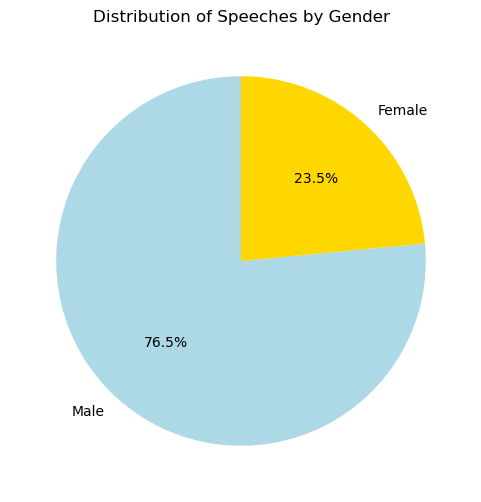

In [12]:
labels = ['Male', 'Female']
sizes = [gender_speech_counts.male, gender_speech_counts.female]
colors = ['lightblue', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Speeches by Gender')

plt.show()

### Nach Länge der Reden insgesamt

In [13]:
# Calculate the total length of speeches by each gender (number of characters)
gender_speech_lengths = df.groupby('speaker_gender')['speech_length'].sum()

# Calculate the ratio of speech lengths by each gender
total_speech_length = gender_speech_lengths.sum()
speech_length_ratio = gender_speech_lengths / total_speech_length

speech_length_ratio

speaker_gender
female    0.216732
male      0.783268
Name: speech_length, dtype: float64

In [14]:
gender_summary = df.groupby('speaker_gender')['speech_length'].describe()
gender_summary

,count,mean,std,min,25%,50%,75%,max
speaker_gender,,,,,,,,
female,228097.0,1476.224641,2972.57608,1.0,57.0,184.0,1316.0,124673.0
male,743167.0,1637.464340,3639.35166,0.0,70.0,312.0,1290.0,352221.0


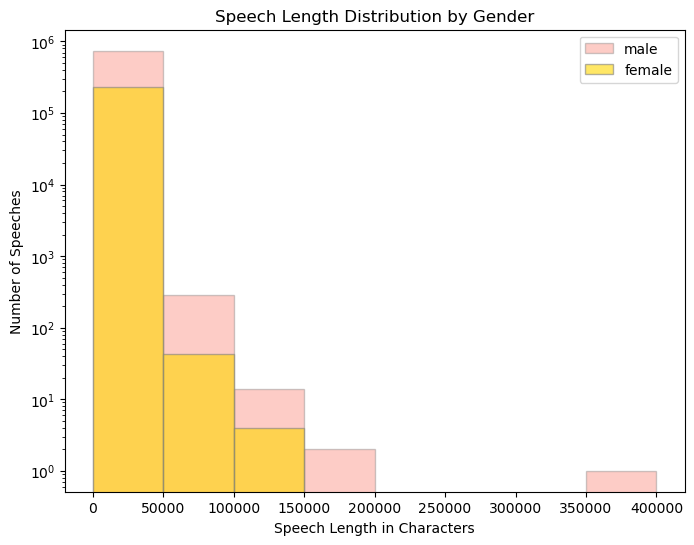

In [15]:
plt.figure(figsize=(8, 6))

colors = {'male': 'salmon', 'female': 'gold'}
alphas = {'male': 0.4, 'female': 0.6}

for gender in ["male", "female"]:
    plt.hist(
        df[df['speaker_gender'] == gender]['speech_length'], 
        bins=[0,50000,100000,150000,200000,250000,300000,350000,400000], # list
        alpha=alphas[gender], 
        label=gender,
        log=True,
        color=colors[gender],
        edgecolor='grey'
    )

plt.title('Speech Length Distribution by Gender')
plt.xlabel('Speech Length in Characters')
plt.ylabel('Number of Speeches') # within length range
plt.legend()
plt.show()

C:\Users\Ana\AppData\Local\Temp\ipykernel_69504\943203183.py:15: RuntimeWarning: invalid value encountered in scalar divide
  male_speech_length_ratio = male_total_length / total_speech_length
C:\Users\Ana\AppData\Local\Temp\ipykernel_69504\943203183.py:16: RuntimeWarning: invalid value encountered in scalar divide
  female_speech_length_ratio = female_total_length / total_speech_length


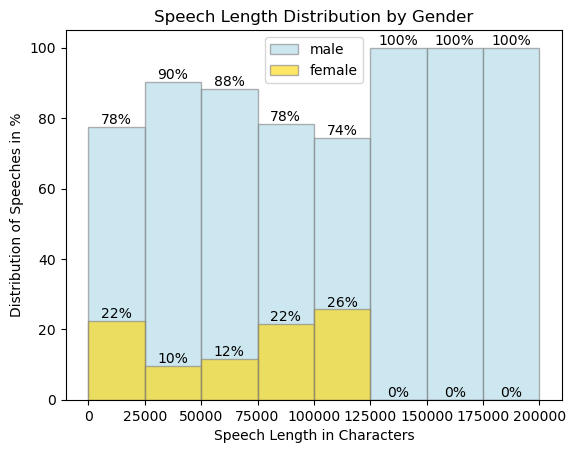

In [16]:
# new dataframe with only the needed information
relative_freqs = pd.DataFrame()

# parameters for speech length ranges
max_cats = 9
cat_steps = 25000

for speech_length_cat in range(max_cats):
    speeches_of_cat = df[(df["speech_length"] > speech_length_cat * cat_steps) 
                         & (df["speech_length"] < (speech_length_cat + 1) * cat_steps)]
    
    total_speech_length = speeches_of_cat["speech_length"].sum()
    male_total_length = speeches_of_cat[speeches_of_cat["speaker_gender"] == "male"]["speech_length"].sum()
    female_total_length = speeches_of_cat[speeches_of_cat["speaker_gender"] == "female"]["speech_length"].sum()
    male_speech_length_ratio = male_total_length / total_speech_length
    female_speech_length_ratio = female_total_length / total_speech_length

    relative_freqs = pd.concat([relative_freqs, pd.DataFrame.from_records([
        {
            "gender": "male",
            "speech_length_cat": speech_length_cat,
            "relative_gender_frequency": male_speech_length_ratio
        },
        {
            "gender": "female",
            "speech_length_cat": speech_length_cat,
            "relative_gender_frequency": female_speech_length_ratio
        }])], ignore_index=True)

category_labels = [f"{cat * cat_steps}" for cat in range(max_cats)]
colors = {'male': 'lightblue', 'female': 'gold'}

for gender in ["male", "female"]:
    p = plt.bar(
            category_labels, relative_freqs[relative_freqs["gender"] == gender]["relative_gender_frequency"] * 100, 
            width=1, 
            label=gender,
            alpha=0.6, 
            color=colors[gender],
            edgecolor='grey',
            align='edge'
        )
    plt.bar_label(p, label_type='edge', fmt='{:0.0f}%')
    
#TODO sinnvolle Betitelung
plt.title('Speech Length Distribution by Gender')
plt.xlabel('Speech Length in Characters')
plt.ylabel('Distribution of Speeches in %') # within length range
plt.legend()

plt.show()
